# Wine Case Analysis: *Wine Spectator*'s Top 100 Wines, 1988-2020
List available online on *Wine Spectator*'s [Top 100 Lists web site](https://top100.winespectator.com/lists/).

## File Setup

In [4]:
# import and initialize main python libraries
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import bar_chart_race as bcr
import seaborn as sns

# import libraries for file navigation
import os
import shutil
import glob
from pandas_ods_reader import read_ods

# import other packages
from scipy import stats
from sklearn import linear_model

# import geo packages
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

# import Geopy packages
import geopy
from geopy.geocoders import Nominatim

In [5]:
# initialize vizualization set
sns.set(style="whitegrid", palette="colorblind", color_codes=True)
sns.mpl.rc("figure", figsize=(10, 6))

# Jupyter Notebook
%matplotlib inline

## Dataframe Exploration

In [7]:
# Note: save CSV files in UTF-8 format to preserve special characters.
df_Wine_00 = pd.read_csv('./Wine_Hier00.csv')
df_Wine_01 = pd.read_csv('./Wine_Hier01.csv')
df_GeoCache = pd.read_csv('./GeoCache.csv')
df_Flag = pd.read_csv('./emoji_list.csv')

In [8]:
df_Wine_00.shape

(3304, 25)

In [9]:
df_Wine_01.shape

(3304, 25)

In [10]:
df_Wine_00.dtypes

Review_Year           float64
Rank                   object
Vintage                object
Score                 float64
Price                  object
Winemaker              object
Wine                   object
Wine_Style             object
Grape_Blend            object
Blend_List             object
Geography              object
Cases_Made            float64
Cases_Imported        float64
Reviewer               object
Drink_now             float64
Best_Drink_from       float64
Best_Drink_Through    float64
Review                 object
Hierarchy              object
Address                object
loc                    object
point                  object
lat                   float64
long                  float64
altitude              float64
dtype: object

In [11]:
df_Wine_01.shape

(3304, 25)

In [12]:
# CSV of wines is retaining a blank row at the end of the dataset. Remove the last row to prevent data type errors.

# number of rows to drop
n = 1

df_Wine_00.drop(df_Wine_00.tail(n).index, inplace = True)
df_Wine_01.drop(df_Wine_01.tail(n).index, inplace = True)

In [13]:
# Review_Year
# Convert Review_Year from float to int
df_Wine_00['Review_Year'] = df_Wine_00['Review_Year'].astype(int)
df_Wine_01['Review_Year'] = df_Wine_01['Review_Year'].astype(int)

In [14]:
df_GeoCache.shape

(1228, 8)

In [15]:
df_Flag.shape

(19, 3)

In [16]:
df_Wine_00.sample(10)

,Review_Year,Rank,Vintage,Score,Price,Winemaker,Wine,Wine_Style,Grape_Blend,Blend_List,...,Best_Drink_from,Best_Drink_Through,Review,Hierarchy,Address,loc,point,lat,long,altitude
814,2012,13,2009,95.0,55,Quinta do Vallado,Touriga Nacional Douro,Red,Touriga Nacional,NaN,...,2012.0,2020.0,"Very polished and ripe, with intense mocha and...",Hierarchy_00,Portugal,Portugal,"(40.0332629, -7.8896263, 0.0)",40.033263,-7.889626,0.0
1359,2007,58,2005,94.0,74,Alban,Syrah Edna Valley Alban Estate Reva,Red,Shiraz | Syrah,NaN,...,2008.0,2014.0,"Rich and beefy, with plush smoke, blueberry, b...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
1358,2007,57,2006,91.0,22,Thorn-Clarke,Shiraz Barossa Shotfire,Red,Shiraz | Syrah,NaN,...,2007.0,2016.0,Aims for refinement and achieves a supple bala...,Hierarchy_00,Australia,Australia,"(-24.7761086, 134.755, 0.0)",-24.776109,134.755000,0.0
279,2018,80,2015,92.0,36,Beringer,Cabernet Sauvignon Knights Valley,Red,Cabernet Sauvignon,NaN,...,2018.0,2026.0,"Firm, rich and tightly focused on a core of vi...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
746,2013,45,2010,94.0,58,Château Doisy Daëne,Barsac,Dessert & Fortified,Sauvignon Blanc – Semillon,NaN,...,2013.0,2030.0,"A juicy, compact style, with tangerine, aprico...",Hierarchy_00,France,France,"(46.603354, 1.8883335, 0.0)",46.603354,1.888333,0.0
355,2017,55,2015,92.0,38,Trimbach,Pinot Gris Alsace Réserve Personnelle,White,Pinot Grigio | Pinot Gris,NaN,...,2017.0,2029.0,"A mouthwatering Pinot Gris, with exotic notes ...",Hierarchy_00,France,France,"(46.603354, 1.8883335, 0.0)",46.603354,1.888333,0.0
1741,2003,40,2001,93.0,36,Patz & Hall,Chardonnay Russian River Valley Dutton Ranch,White,Chardonnay,NaN,...,2003.0,2007.0,"An uncommonly rich, almost sweet-tasting Chard...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
232,2018,33,2015,94.0,58,Château Branaire-Ducru,St.-Julien,Red,Blend,Bordeaux Blend Red,...,2020.0,2038.0,"This pumps lush fig, boysenberry and blackberr...",Hierarchy_00,France,France,"(46.603354, 1.8883335, 0.0)",46.603354,1.888333,0.0
67,2020,68,2017,95.0,100,Mt. Brave,Cabernet Sauvignon Mount Veeder,Red,Cabernet Sauvignon,NaN,...,2023.0,2040.0,"This offers blackberry, boysenberry and açaí b...",Hierarchy_00,USA,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
1950,2001,49,1994,91.0,23,Bodegas Montecillo,Rioja Gran Reserva,Red,Rioja,NaN,...,2001.0,2010.0,Lovely. This youthful red is both elegant and ...,Hierarchy_00,Spain,España,"(39.3262345, -4.8380649, 0.0)",39.326234,-4.838065,0.0


## Pivot on Address

### Hierarchy 00

In [30]:
# Count by Wine Style by Address - All Years
df_Count_WS_All_00 = pd.DataFrame({'Count' : df_Wine_00.groupby(['Wine_Style', 'Address','lat','long'])['Score'].count()}).reset_index()
df_Count_WS_All_00.sample(10)

,Wine_Style,Address,lat,long,Count
1,Dessert & Fortified,Canada,61.066692,-107.991707,1
40,White,Portugal,40.033263,-7.889626,1
26,Sparkling,France,46.603354,1.888333,52
43,White,USA,39.783730,-100.445882,347
2,Dessert & Fortified,France,46.603354,1.888333,23
10,Red,Austria,47.200034,13.199959,1
25,Rosé | Rosado,USA,39.783730,-100.445882,2
14,Red,Greece,38.995368,21.987713,1
16,Red,Italy,42.638426,12.674297,435
24,Rosé | Rosado,France,46.603354,1.888333,7


In [31]:
# Count by Wine Style - By Review Year
df_Count_WS_ByYear_00 = pd.DataFrame({'Count' : df_Wine_00.groupby(['Review_Year', 'Wine_Style', 'Address','lat','long'])['Score'].count()}).reset_index()
df_Count_WS_ByYear_00.sample(10)

,Review_Year,Wine_Style,Address,lat,long,Count
368,2010,Sparkling,France,46.603354,1.888333,1
31,1990,Sparkling,USA,39.783730,-100.445882,1
537,2017,Sparkling,USA,39.783730,-100.445882,1
234,2004,Red,Chile,-31.761336,-71.318770,3
26,1990,Red,France,46.603354,1.888333,9
597,2019,White,South Africa,-28.816624,24.991639,1
555,2018,Red,Italy,42.638426,12.674297,14
505,2016,Red,Portugal,40.033263,-7.889626,3
145,1998,White,France,46.603354,1.888333,13
497,2016,Dessert & Fortified,Spain,39.326234,-4.838065,1


### Hierarchy 01

In [32]:
# Count by Wine Style - All Years
df_Count_All_01 = pd.DataFrame({'Count' : df_Wine_01.groupby(['Wine_Style', 'Address','lat','long'])['Score'].count()}).reset_index()
df_Count_All_01.sample(10)

,Wine_Style,Address,lat,long,Count
13,Red,"Alentejo, Portugal",38.055100,-7.860580,2
27,Red,"Campania, Italy",40.860672,14.843984,3
105,White,"Bordeaux, France",44.841225,-0.580036,11
141,White,"Rheingau, Germany",50.133907,8.069960,9
63,Red,"Piedmont | Piemonte, Italy",44.760563,8.299854,120
47,Red,"Lombardy, Italy",45.570369,9.773252,5
147,White,"South Australia, Australia",-30.534366,135.630121,24
15,Red,Australia,-24.776109,134.755000,2
128,White,"Macedonia, Greece, Greece",41.742707,26.177076,4
149,White,"Trentino,Alto Adige, Italy",46.102817,11.129543,6


In [33]:
# Count by Wine Style - By Review Year
df_Count_ByYear_01 = pd.DataFrame({'Count' : df_Wine_01.groupby(['Review_Year', 'Score', 'Address','lat','long'])['Price'].count()}).reset_index()
df_Count_ByYear_01.sample(10)

,Review_Year,Score,Address,lat,long,Count
1978,2019,93.0,"South Australia, Australia",-30.534366,135.630121,1
942,2005,93.0,"Burgundy, France",47.278087,4.222486,1
1803,2017,90.0,"Veneto, Italy",45.647666,11.866525,2
103,1990,92.0,"Rhône, France",45.880235,4.564534,1
1684,2015,93.0,"Rioja, Spain",42.281464,-2.482805,1
486,1998,91.0,"Languedoc-Roussillon, France",43.654203,3.674670,1
110,1990,93.0,"Tuscany, Italy",43.458654,11.138920,2
1183,2008,95.0,"Bordeaux, France",44.841225,-0.580036,1
581,1999,96.0,"South Australia, Australia",-30.534366,135.630121,1
1579,2014,90.0,"Vin de Pays , France",47.865343,-0.901141,1


## Map Results: World Map
Plot count results at Hierarchy 00 on world map.
### Import Shapefile
* See [World Map Units, 1:10 million (2012)](https://geo.nyu.edu/catalog/stanford-gj285pj7891) from the NYU Spatial Data Repository.
* See [GeoPandas 101: Plot any data with a latitude and a longitude on a map](https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972).

In [27]:
world_map = gpd.read_file('./shapefiles/world/gj285pj7891.shp')

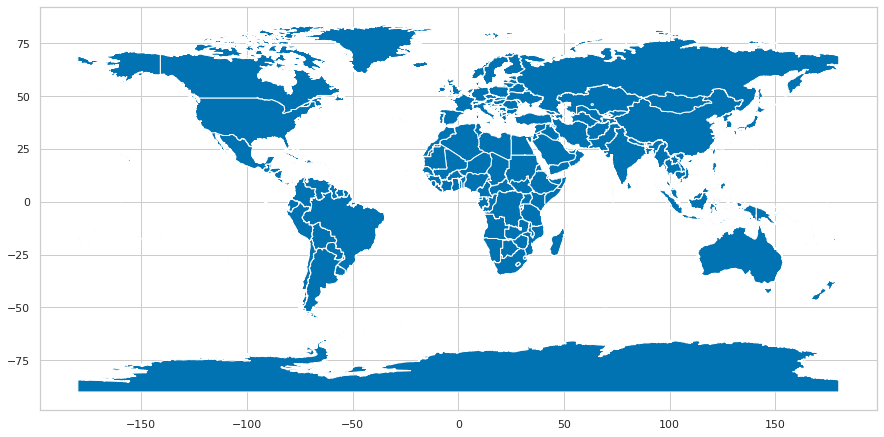

In [29]:
fig, ax = plt.subplots(figsize = (15, 15))
world_map.plot(ax = ax)

In [ ]:
# Define a coordinate reference system (CRS)
crs = {'init': 'espg:4326'}

## Plot Counts by Hierarchy 00 (Country)

In [ ]:
def count_style_country(wine_style)